In [1]:
import pandas as pd
import os 
dir_path = os.getcwd()
path_part = os.path.dirname(dir_path)
years = [2021, 2022]
scenario_name="20240220_Mierendorff"

In [2]:
# Set up district generator 
from districtgenerator.datahandler import Datahandler

In [4]:
for year in [2020, 2021, 2022]: 
    # Set epw 2020 weather File 
    berlin_2020 = os.path.join(path_part, 'data', 'examples' , 'weather_data' ,f'AMY_2010_2022_{year}.epw')
    partial_mierendorff = Datahandler()
    partial_mierendorff.setWeatherFile(berlin_2020)
    partial_mierendorff.initializeBuildings(scenario_name="20240220_Mierendorff")
    partial_mierendorff.generateEnvironment()
    result_path = os.path.join(path_part, 'data', 'partial' ,str(year))
    partial_mierendorff.setResultPath(result_path)
    partial_mierendorff.generateBuildings()
    partial_mierendorff.generateDemands(savePath='Block020023')

8785
<class 'int'> 31622400 <class 'int'> 3600 <class 'int'> 3600 8785
Calculate demands of building AB_18_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023
Save heating profile of building AB_18_0 in c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023
Calculate demands of building AB_13_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023
Save heating profile of building AB_13_0 in c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023
Calculate demands of building MFH_7_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023
Save heating profile of building MFH_7_0 in c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023
Calculate demands of building AB_61_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023
Save heating profile of building AB_61_0 in c:\Users\felix\Programmieren\tecdm

# Maybe its an option to speed up the simulation with reloading the profiles 

In [ ]:
partial_mierendorff.time["timeResolution"]  

{'timeResolution': 3600,
 'dataResolution': 3600,
 'dataLength': 31536000,
 'timeSteps': 8760}

In [11]:
import pandas as pd 
building_ids = ['AB_13_0', 'AB_18_0', 'AB_61_0', 'MFH_7_0']
project_folder = os.path.dirname(os.getcwd())

demand_dict = {
    "Electricity": {},
    "Heating": {},
    "DHW": {},
}
for year in [2020, 2021, 2022]:
    elec_demand = 0 
    heat_demand = 0
    DHW_demand = 0 
    results_path = os.path.join(project_folder, 'data', 'results', 'demands', 'Block020023', str(year) )
    for building in building_ids:
        elec_file_path = os.path.join(results_path, f'elec_{building}.csv')
        elec_df = pd.read_csv(elec_file_path, names=["demand"])
        heat_file_path = os.path.join(results_path, f'heat_{building}.csv')
        heat_df = pd.read_csv(heat_file_path, names=["demand"])
        dhw_file_path = os.path.join(results_path, f'dhw_{building}.csv')
        dhw_df = pd.read_csv(dhw_file_path, names=["demand"])
        elec_demand = elec_demand + elec_df["demand"].sum()
        heat_demand = heat_demand + heat_df["demand"].sum()
        DHW_demand = DHW_demand + dhw_df["demand"].sum()
    # District generator provides output in Wh
    demand_dict["Electricity"][year] = elec_demand/1000000
    demand_dict["Heating"][year] = heat_demand/1000000
    demand_dict["DHW"][year] = DHW_demand/1000000


In [13]:
demand_dict

{'Electricity': {2020: 202.44864911000002,
  2021: 216.83747299,
  2022: 206.54445705},
 'Heating': {2020: 528.39432536, 2021: 651.6409433500002, 2022: 550.27924413},
 'DHW': {2020: 130.50523958, 2021: 134.99291282, 2022: 131.5465444}}

In [ ]:
# Plot and compare 

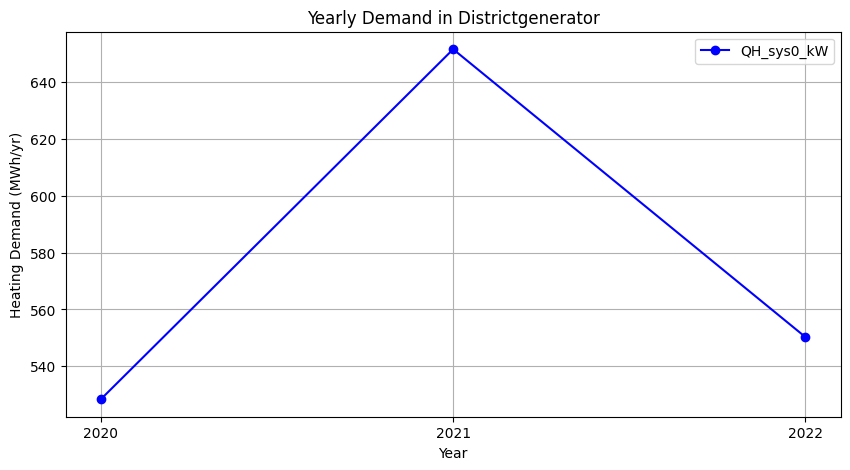

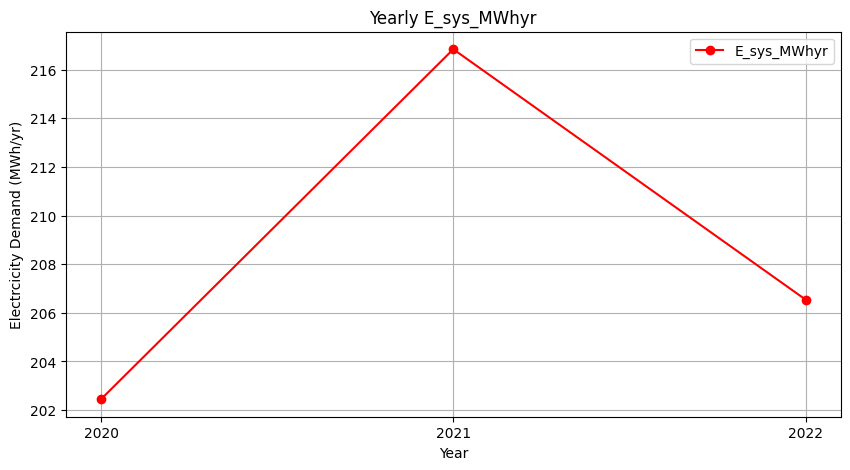

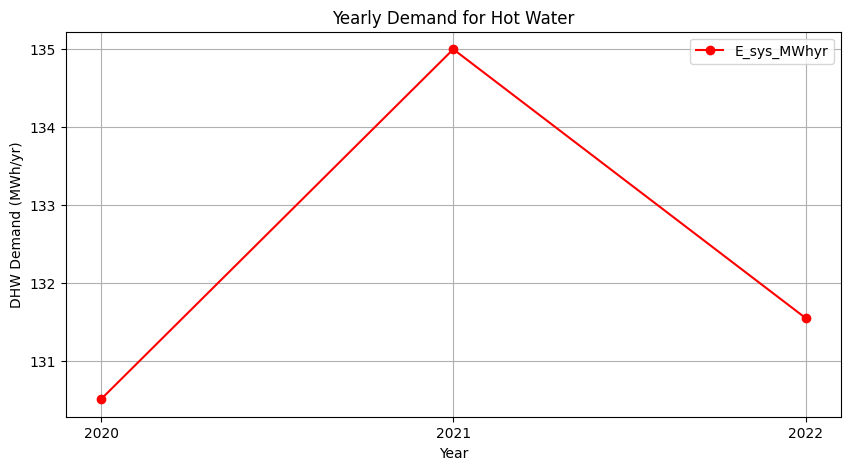

In [15]:
import matplotlib.pyplot as plt

# Provided data
# Extracting data for plotting
years = [2020, 2021, 2022]
qhsys0_kw_values = [demand_dict['Heating'][year]for year in years]
esys_mwhyr_values = [demand_dict['Electricity'][year] for year in years]
dhw_mwhyr_values = [demand_dict["DHW"][year] for year in years]

# Plotting QH_sys0_kW
plt.figure(figsize=(10, 5))
plt.plot(years, qhsys0_kw_values, marker='o', linestyle='-', color='blue', label='QH_sys0_kW')
plt.title('Yearly Demand in Districtgenerator')
plt.xlabel('Year')
plt.ylabel('Heating Demand (MWh/yr)')
plt.xticks(years)
plt.grid(True)
plt.legend()

# Showing the first plot
plt.show()

# Plotting E_sys_MWhyr
plt.figure(figsize=(10, 5))
plt.plot(years, esys_mwhyr_values, marker='o', linestyle='-', color='red', label='E_sys_MWhyr')
plt.title('Yearly E_sys_MWhyr')
plt.xlabel('Year')
plt.ylabel('Electrcicity Demand (MWh/yr)')
plt.xticks(years)
plt.grid(True)
plt.legend()

# Plotting DHW
plt.figure(figsize=(10, 5))
plt.plot(years, dhw_mwhyr_values, marker='o', linestyle='-', color='red', label='E_sys_MWhyr')
plt.title('Yearly Demand for Hot Water')
plt.xlabel('Year')
plt.ylabel('DHW Demand (MWh/yr)')
plt.xticks(years)
plt.grid(True)
plt.legend()


# Showing the second plot
plt.show()

In [20]:
# Get real data for comparison
# Block: 20023 
gas_path = os.path.join(path_part, 'data', 'berlin', 'Gas_Berlin_2020_2022.xls')
gas_data = pd.read_excel(gas_path)
gas_data_filtered = gas_data[gas_data["Blocknummer"] == 20023]
gas_mwhyr = {
    2020: gas_data_filtered["Gasverbrauch 2020 [MWh]"].item(),
    2021 : gas_data_filtered["Gasverbrauch 2021 [MWh]"].item(),
    2022: gas_data_filtered["Gasverbrauch 2022 [MWh]"].item()
}
elec_path = os.path.join(path_part, 'data', 'berlin', 'Elec_Berlin_2020_2022.xls')
elec_data = pd.read_excel(elec_path)
elec_data_filtered = elec_data[elec_data["Blocknummer"] == 20023]
elec_mwhyr = {
    2020: elec_data_filtered["Stromverbrauch 2020 [MWh]"].item(),
    2021 : elec_data_filtered["Stromverbrauch 2021 [MWh]"].item(),
    2022: elec_data_filtered["Stromverbrauch 2022 [MWh]"].item()
}
elec_mwhyr

dh_path = os.path.join(path_part, 'data', 'berlin', 'DH_Berlin_2020_2022.xls')
dh_data = pd.read_excel(dh_path)
dh_data_filtered = dh_data[dh_data["Blocknummer"] == 20023]
dh_data_filtered = dh_data_filtered.replace('-', 0)
dh_mwhyr = {
    2020: dh_data_filtered["Fernwärmeverbrauch 2020 [MWh]"].item(),
    2021 : dh_data_filtered["Fernwärmeverbrauch 2021 [MWh]"].fillna(0).item(),
    2022: dh_data_filtered["Fernwärmeverbrauch 2022 [MWh]"].fillna(0).item()
}
dh_mwhyr

{2020: 851.346, 2021: 0, 2022: 0}

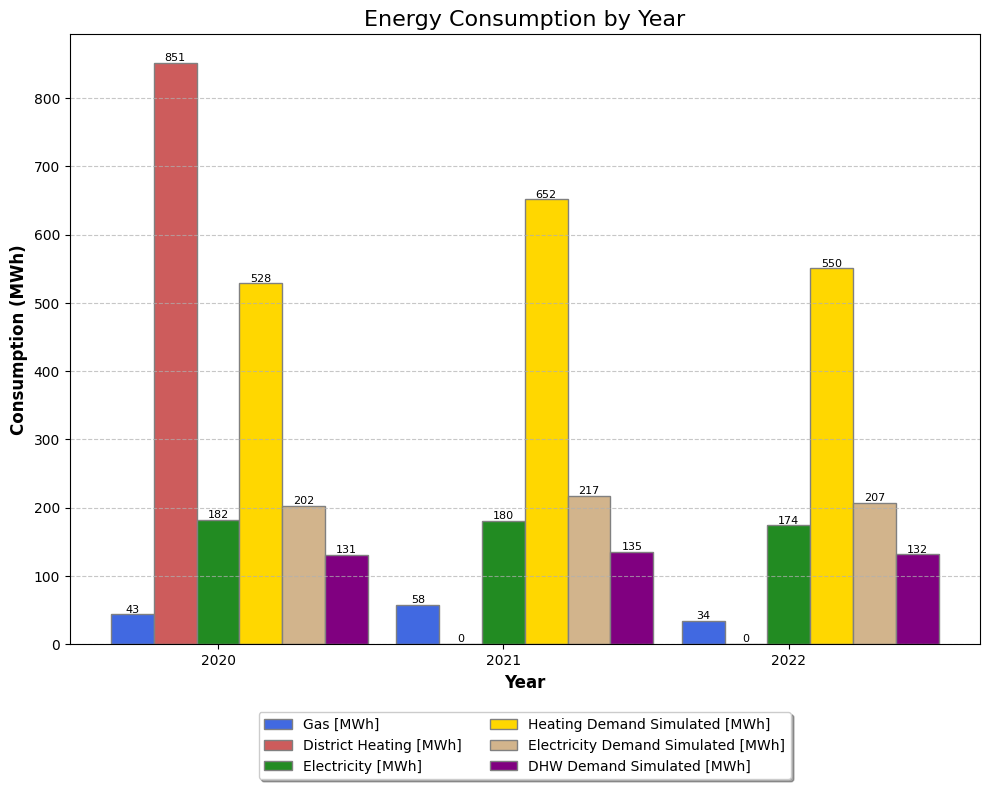

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume the dictionaries 'gas_mwhyr', 'dh_mwhyr', 'elec_mwhyr' and 'data_dict' are already defined as in the original scenario.

# Years for the x-axis
years = list(gas_mwhyr.keys())

# Values for the y-axis
gas_values = list(gas_mwhyr.values())
dh_values = list(dh_mwhyr.values())
elec_values = list(elec_mwhyr.values())
sim_heating = list(demand_dict["Heating"].values())
sim_elec = list(demand_dict["Electricity"].values())
sim_dhw = list(demand_dict["DHW"].values())

# Set the width of the bars
bar_width = 0.15  # Reduced width to introduce space between bars

# Set the position of the bars on the x-axis
r1 = np.arange(len(gas_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Make the plot
plt.figure(figsize=(10, 8))  # Increased figure size
plt.bar(r1, gas_values, color='royalblue', width=bar_width, edgecolor='grey', label='Gas [MWh]')
plt.bar(r2, dh_values, color='indianred', width=bar_width, edgecolor='grey', label='District Heating [MWh]')
plt.bar(r3, elec_values, color='forestgreen', width=bar_width, edgecolor='grey', label='Electricity [MWh]')
plt.bar(r4, sim_heating, color='gold', width=bar_width, edgecolor='grey', label='Heating Demand Simulated [MWh]')
plt.bar(r5, sim_elec, color='tan', width=bar_width, edgecolor='grey', label='Electricity Demand Simulated [MWh]')
plt.bar(r6, sim_dhw, color="purple", width=bar_width, edgecolor='grey', label='DHW Demand Simulated [MWh]')

# Add labels to the x-axis and y-axis
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Consumption (MWh)', fontweight='bold', fontsize=12)
plt.xticks([r + bar_width*2 for r in range(len(gas_values))], years, fontsize=10)

# Create legend & Show graphic
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
plt.title('Energy Consumption by Year', fontsize=16)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally, add value labels on top of each bar
for i in range(len(r1)):
    plt.text(r1[i], gas_values[i], str(round(gas_values[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r2[i], dh_values[i], str(round(dh_values[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r3[i], elec_values[i], str(round(elec_values[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r4[i], sim_heating[i], str(round(sim_heating[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r5[i], sim_elec[i], str(round(sim_elec[i])), ha='center', va='bottom', fontsize=8)
    plt.text(r6[i], sim_dhw[i], str(round(sim_dhw[i])), ha='center', va='bottom', fontsize=8)

# Show graphic
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()